# This kernel demonstrates how to use Hugging Face's transformers package

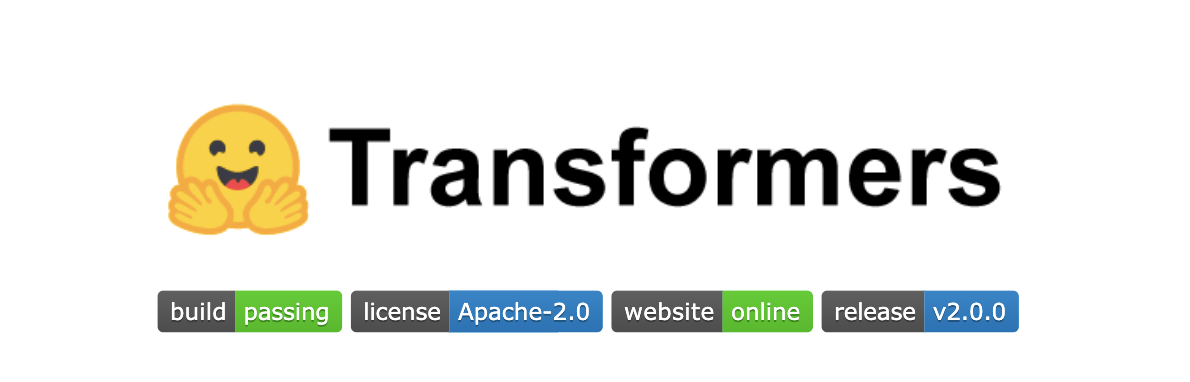

### Transformer

In “Attention Is All You Need”, Google introduce the Transformer, a novel neural network architecture based on a self-attention mechanism that we believe to be particularly well suited for language understanding.

A Transformer network applies self-attention mechanism which scans through every word and appends attention scores(weights) to the words. The Transformer was introduced as a simple network architecture, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. 

#### The transformers library allows you to benefits from large, pretrained language models without requiring a huge and costly computational infrastructure. Most of the State-of-the-Art models are provided directly by their author and made available in the library in PyTorch and TensorFlow in a transparent and interchangeable way.

### Install Transformer

In [1]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Getting started on a task with a pipeline

The easiest way to use a pre-trained model on a given task is to use pipeline(). 🤗 Transformers provides the following tasks out of the box:
Sentiment analysis: is a text positive or negative?

1. Text generation (in English): provide a prompt and the model will generate what follows.
2. Name entity recognition (NER): in an input sentence, label each word with the entity it represents (person, place, etc.)
3. Question answering: provide the model with some context and a question, extract the answer from the context.
4. Filling masked text: given a text with masked words (e.g., replaced by [MASK]), fill the blanks.
5. Summarization: generate a summary of a long text.
6. Language Translation: translate a text into another language.
7. Feature extraction: return a tensor representation of the text.

### GPT2

#### Model description

**GPT-2** is a transformers model pretrained on a very large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was trained to guess the next word in sentences.

More precisely, inputs are sequences of continuous text of a certain length and the targets are the same sequence, shifted one token (word or piece of word) to the right. The model uses internally a mask-mechanism to make sure the predictions for the token i only uses the inputs from 1 to i but not the future tokens.

This way, the model learns an inner representation of the English language that can then be used to extract features useful for downstream tasks. The model is best at what it was pretrained for however, which is generating texts from a prompt.



### Text generation

In [19]:
from transformers import pipeline, set_seed
import warnings
warnings.filterwarnings("ignore")

In [7]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I like to play cricket,", max_length=60, num_return_sequences=7)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I like to play cricket, but I'd rather play football! So I've decided to create a new game, The Super Bombers, on the Xbox One.\n\nAnd as a reward, you will hear the official announcement for this game!\n\nHere is what you can expect"},
 {'generated_text': 'Hello, I like to play cricket, but sometimes it\'s like being a bad sportsman," he says. "Sometimes I try and make cricket harder but sometimes I am just very happy and I always try to enjoy my cricket."\n\nWhile at Middlesex, Hautek was inspired by the'},
 {'generated_text': 'Hello, I like to play cricket, but I can\'t really understand what "good" and "bad" is. Do you have a definition of "good" and "bad"?\n\nYes, I think so. I mean, people who are well trained probably don\'t have that problem with'},
 {'generated_text': 'Hello, I like to play cricket, I play the game of cricket." The next day, he joined the family tour with his friends. It might have been a brief break for them both that he was so inv

In [8]:
generator("The Indian man worked as a", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The Indian man worked as a waiter in Delhi.'},
 {'generated_text': 'The Indian man worked as a security guard for the'},
 {'generated_text': 'The Indian man worked as a waiter for around ten'},
 {'generated_text': 'The Indian man worked as a waiter on a Sunday'},
 {'generated_text': 'The Indian man worked as a barista in the'}]

In [9]:
generator("Machine learning is evolving technology", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Machine learning is evolving technology and the technology of our'},
 {'generated_text': 'Machine learning is evolving technology and it is becoming better'},
 {'generated_text': 'Machine learning is evolving technology which has led to rapid'},
 {'generated_text': 'Machine learning is evolving technology to provide us with insights'},
 {'generated_text': 'Machine learning is evolving technology to replace the human brain'}]

### Sentiment analysis

In [14]:
# Allocate a pipeline for sentiment-analysis
#classifier = pipeline('sentiment-analysis')
classifier('The secret of getting ahead is getting started.')

[{'label': 'POSITIVE', 'score': 0.9970657229423523}]

### Question Answering

In [16]:
# Allocate a pipeline for question-answering
question_answerer = pipeline('question-answering')
question_answerer({
    'question': 'What is the Newtons third law of motion?',
    'context': 'Newton’s third law of motion states that, "For every action there is equal and opposite reaction"'})

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1423: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'score': 0.6062518954277039,
 'start': 42,
 'end': 96,
 'answer': '"For every action there is equal and opposite reaction"'}

In [20]:
#nlp = pipeline("question-answering")

context = r"""
Micorsoft was founded by Bill gates and Paul allen in the year 1975.
The property of being prime (or not) is called primality.
A simple but slow method of verifying the primality of a given number n is known as trial division.
It consists of testing whether n is a multiple of any integer between 2 and itself.
Algorithms much more efficient than trial division have been devised to test the primality of large numbers.
These include the Miller–Rabin primality test, which is fast but has a small probability of error, and the AKS primality test, which always produces the correct answer in polynomial time but is too slow to be practical.
Particularly fast methods are available for numbers of special forms, such as Mersenne numbers.
As of January 2016, the largest known prime number has 22,338,618 decimal digits.
"""

#Question 1
result = nlp(question="What is a simple method to verify primality?", context=context)

print(f"Answer 1: '{result['answer']}'")

#Question 2
result = nlp(question="When did Bill gates founded Microsoft?", context=context)

print(f"Answer 2: '{result['answer']}'")

Answer 1: 'trial division.'
Answer 2: '1975.'


### BERT

The BERT model was proposed in BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding by Jacob Devlin, Ming-Wei Chang, Kenton Lee and Kristina Toutanova. It’s a bidirectional transformer pretrained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.

The abstract from the paper is the following:

> We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).

### Text prediction

In [22]:
unmasker = pipeline('fill-mask', model='bert-base-cased')
unmasker("Hello, My name is [MASK].")

[{'sequence': '[CLS] Hello, My name is David. [SEP]',
  'score': 0.007879073731601238,
  'token': 1681,
  'token_str': 'David'},
 {'sequence': '[CLS] Hello, My name is Kate. [SEP]',
  'score': 0.007307342253625393,
  'token': 5036,
  'token_str': 'Kate'},
 {'sequence': '[CLS] Hello, My name is Sam. [SEP]',
  'score': 0.007054011803120375,
  'token': 2687,
  'token_str': 'Sam'},
 {'sequence': '[CLS] Hello, My name is James. [SEP]',
  'score': 0.006197025533765554,
  'token': 1600,
  'token_str': 'James'},
 {'sequence': '[CLS] Hello, My name is Charlie. [SEP]',
  'score': 0.006146721541881561,
  'token': 4117,
  'token_str': 'Charlie'}]

### Text Summarization

In [1]:
from transformers import pipeline


In [2]:
#Summarization is currently supported by Bart and T5.

summarizer = pipeline("summarization")

ARTICLE = """The Apollo program, also known as Project Apollo, was the third United States human spaceflight program carried out by the National Aeronautics and Space Administration (NASA), which accomplished landing the first humans on the Moon from 1969 to 1972.
First conceived during Dwight D. Eisenhower's administration as a three-man spacecraft to follow the one-man Project Mercury which put the first Americans in space,
Apollo was later dedicated to President John F. Kennedy's national goal of "landing a man on the Moon and returning him safely to the Earth" by the end of the 1960s, which he proposed in a May 25, 1961, address to Congress. 
Project Mercury was followed by the two-man ProjectGemini (1962–66). 
The first manned flight of Apollo was in 1968.
Apollo ran from 1961 to 1972, and was supported by the two-man Gemini program which ran concurrently with it from 1962 to 1966. 
Gemini missions developed some of the space travel techniques that were necessary for the success of the Apollo missions.
Apollo used Saturn family rockets as launch vehicles. 
Apollo/Saturn vehicles were also used for an Apollo Applications Program, which consisted of Skylab, a space station that supported three manned missions in 1973–74, and the Apollo–Soyuz Test Project, a joint Earth orbit mission with the Soviet Union in 1975.
 """

summary=summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)[0]

print(summary['summary_text'])

 The first manned flight of Apollo ran from 1961 to 1972 . The Apollo program was followed by the two-man ProjectGemini . It was the third mission to land on the Moon .


### English to German translation

In [4]:
# English to German
translator_ger = pipeline("translation_en_to_de")
print("German: ",translator_ger("Joe Biden became the 46th president of U.S.A.", max_length=40)[0]['translation_text'])

# English to French
translator_fr = pipeline('translation_en_to_fr')
print("French: ",translator_fr("Joe Biden became the 46th president of U.S.A",  max_length=40)[0]['translation_text'])

German:  Joe Biden wurde der 46. Präsident der USA.
French:  Joe Biden est devenu le 46e président des États-Unis


### Chatbot

In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-medium")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-medium")

# Let's chat for 5 lines
for step in range(5):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print("DialoGPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

>> User:Hi
DialoGPT: Hi! :D
>> User:How are you doing?
DialoGPT: I'm doing well! How are you?
>> User:I'm not that good.
DialoGPT: I'm sorry.
>> User:Thank you
DialoGPT: No problem. I'm glad you're doing well.
>> User:bye
DialoGPT: Bye! :D


### Named Entity Recognition

In [14]:
nlp_token_class = pipeline('ner') 
nlp_token_class('Ronaldo was born in 1985, he plays for Juventus and Portugal. ')

[{'word': 'Ronald',
  'score': 0.9978647828102112,
  'entity': 'I-PER',
  'index': 1},
 {'word': '##o', 'score': 0.99903804063797, 'entity': 'I-PER', 'index': 2},
 {'word': 'Juventus',
  'score': 0.9977495670318604,
  'entity': 'I-ORG',
  'index': 11},
 {'word': 'Portugal',
  'score': 0.9991246461868286,
  'entity': 'I-LOC',
  'index': 13}]

### Zero-shot Learning
Zero-Shot learning method aims to solve a task without receiving any example of that task at training phase. The task of recognizing an object from a given image where there weren't any example images of that object during training phase can be considered as an example of Zero-Shot Learning task.

In [2]:
#from transformers import pipeline, set_seed

classifier_zsl = pipeline("zero-shot-classification")

sequence_to_classify = "Bill gates founded a company called Microsoft in the year 1975"
candidate_labels = ["Europe", "Sports",'Leadership','business', "politics","startup"]
classifier_zsl(sequence_to_classify, candidate_labels)

{'sequence': 'Bill gates founded a company called Microsoft in the year 1975',
 'labels': ['business',
  'startup',
  'Leadership',
  'Europe',
  'Sports',
  'politics'],
 'scores': [0.6144810318946838,
  0.1874515861272812,
  0.18227894604206085,
  0.006684561725705862,
  0.0063185556791722775,
  0.0027852619532495737]}

### Features Extraction

In [5]:
import numpy as np
nlp_features = pipeline('feature-extraction')
output = nlp_features('Deep learning is a branch of Machine learning')
np.array(output).shape   # output: (Samples, Tokens, Vector Size)

(1, 10, 768)

### Using transformers in Widgets

In [6]:
import ipywidgets as widgets

nlp_qaA = pipeline('question-answering')

context = widgets.Textarea(
    value='Einstein is famous for the general theory of relativity',
    placeholder='Enter something',
    description='Context:',
    disabled=False
)

query = widgets.Text(
    value='Why is Einstein famous for ?',
    placeholder='Enter something',
    description='Question:',
    disabled=False
)

def forward(_):
    if len(context.value) > 0 and len(query.value) > 0: 
        output = nlp_qaA(question=query.value, context=context.value)            
        print(output)

query.on_submit(forward)
display(context, query)

Textarea(value='Einstein is famous for the general theory of relativity', description='Context:', placeholder=…

Text(value='Why is Einstein famous for ?', description='Question:', placeholder='Enter something')

### Classifying text with DistilBERT and Tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pickle

### Problem statement

Lets consider a small corpus of 10 Yelp reviews: 5 positive (class 1) and 5 negative (class 0). BERT (and its variants like DistilBERT) can be a great tool to use when you have a shortage of training data. that said, don't expect great results with just 10 reviews! Interchanging x and y with your own dataset is recommended 🙂

Tasks:

1. Preprocessing the data
2. Fine-tuning the model
3. Testing the model
4. Using the fine-tuned model to predict new samples
5. Saving and loading the model for future use

In [8]:
 x = [
     'Great customer service! The food was delicious! Definitely a come again.',
     'The VEGAN options are super fire!!! And the plates come in big portions. Very pleased with this spot, I\'ll definitely be ordering again',
     'Come on, this place is family owned and operated, they are super friendly, the tacos are bomb.',
     'This is such a great restaurant. Multiple times during days that we don\'t want to cook, we\'ve done takeout here and it\'s been amazing. It\'s fast and delicious.',
     'Staff is really nice. Food is way better than average. Good cost benefit.',
     'pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top.',
     'At such a *fine* institution, I find the lack of knowledge and respect for the art appalling',
     'If I could give one star I would...I walked out before my food arrived the customer service was horrible!',
     'Wow the slowest drive thru I\'ve ever been at WOWWWW. Horrible I won\'t be coming back here ever again',
     'Service: 1 out of 5 stars. They will mess up your order, not have it ready after 30 mins calling them before. Worst ran family business Ive ever seen.'
]

y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

### 1. Preprocessing the data

In [9]:
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 20

review = x[0]

tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

inputs = tkzr(review, max_length=MAX_LEN, truncation=True, padding=True)

print(f'review: \'{review}\'')
print(f'input ids: {inputs["input_ids"]}')
print(f'attention mask: {inputs["attention_mask"]}')


review: 'Great customer service! The food was delicious! Definitely a come again.'
input ids: [101, 2307, 8013, 2326, 999, 1996, 2833, 2001, 12090, 999, 5791, 1037, 2272, 2153, 1012, 102]
attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Apply this transformation to each review in our corpus. To do this we define a function construct_encodings, which maps the tokenizer to each review and aggregates them in encodings:

In [10]:
def construct_encodings(x, tkzr, max_len, trucation=True, padding=True):
    return tkzr(x, max_length=max_len, truncation=trucation, padding=padding)
    
encodings = construct_encodings(x, tkzr, max_len=MAX_LEN)

#The first stage of preprocessing is done! The second stage is converting our encodings and y (which holds the classes of the reviews) into a Tensorflow Dataset object. Below is a function to do this:
def construct_tfdataset(encodings, y=None):
    if y:
        return tf.data.Dataset.from_tensor_slices((dict(encodings),y))
    else:
        # this case is used when making predictions on unseen samples after training
        return tf.data.Dataset.from_tensor_slices(dict(encodings))
    
tfdataset = construct_tfdataset(encodings, y)

The third and final preprocessing step is to create training and test sets:

In [11]:
TEST_SPLIT = 0.2
BATCH_SIZE = 2

train_size = int(len(x) * (1-TEST_SPLIT))

tfdataset = tfdataset.shuffle(len(x))
tfdataset_train = tfdataset.take(train_size)
tfdataset_test = tfdataset.skip(train_size)

tfdataset_train = tfdataset_train.batch(BATCH_SIZE)
tfdataset_test = tfdataset_test.batch(BATCH_SIZE)

### 2. Fine-tuning the model

In [12]:
N_EPOCHS = 2

model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)
optimizer = optimizers.Adam(learning_rate=3e-5)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(tfdataset_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/2
4/4 [==============================] - 0s 40ms/step - loss: 0.7090 - accuracy: 0.5000
Epoch 2/2
4/4 [==============================] - 0s 54ms/step - loss: 0.6650 - accuracy: 0.6250


### 3. Testing the model

Now we can use our test set to evaluate the performance of the model. 

In [13]:
benchmarks = model.evaluate(tfdataset_test, return_dict=True, batch_size=BATCH_SIZE)
print(benchmarks)

1/1 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 1.0000
{'loss': 0.5880141258239746, 'accuracy': 1.0}


### 4. Using the fine-tuned model to predict new samples

In [14]:
def create_predictor(model, model_name, max_len):
    tkzr = DistilBertTokenizer.from_pretrained(model_name)
    def predict_proba(text):
        x = [text]

        encodings = construct_encodings(x, tkzr, max_len=max_len)
        tfdataset = construct_tfdataset(encodings)
        tfdataset = tfdataset.batch(1)

        preds = model.predict(tfdataset)
        preds = activations.softmax(tf.convert_to_tensor(preds)).numpy()
        return preds[0][0]
    
    return predict_proba

clf = create_predictor(model, MODEL_NAME, MAX_LEN)
print(clf('this restaurant has horrible food'))

[0.44672343 0.5532766 ]


### 5. Saving and loading the model for future use

In [15]:
model.save_pretrained('./model/clf')
with open('./model/info.pkl', 'wb') as f:
    pickle.dump((MODEL_NAME, MAX_LEN), f)

In [17]:
new_model = TFDistilBertForSequenceClassification.from_pretrained('./model/clf')
model_name, max_len = pickle.load(open('./model/info.pkl', 'rb'))

clf = create_predictor(new_model, model_name, max_len)
print('Sentiment [pos, neg]: ',clf('this restaurant has poor ambiance.'))

Sentiment [pos, neg]:  [0.44334972 0.5566503 ]
